## BASIC RAG
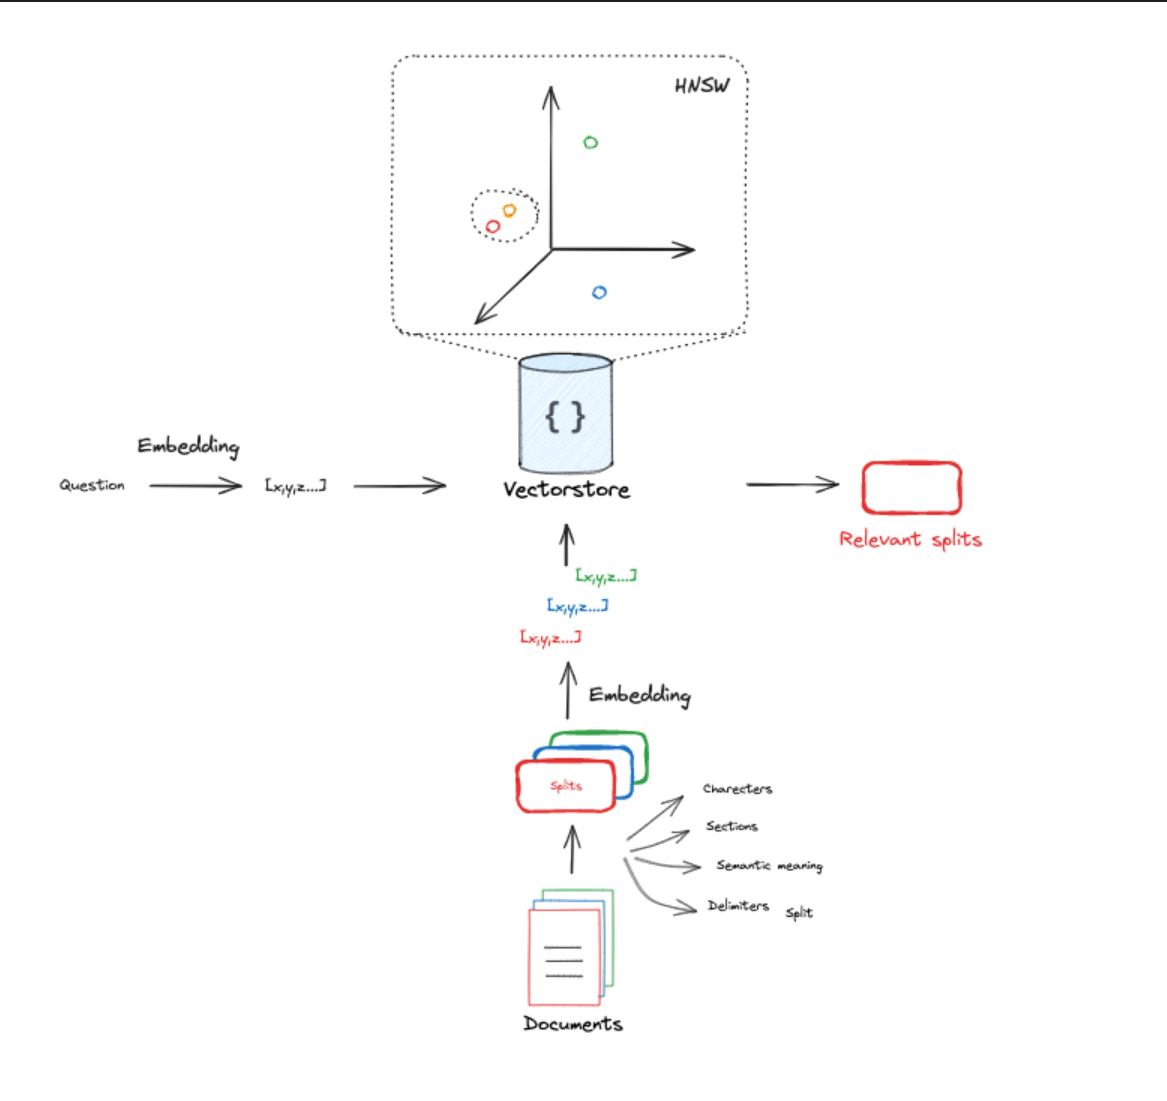

In [10]:
from langchain_community.document_loaders import WikipediaLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_community.llms import HuggingFaceHub  # or use OpenAI, Ollama, etc.

# Step 1: Load a Wikipedia Page
loader = WikipediaLoader(query="Natural Language Processing", lang="en")
docs = loader.load()

# Step 2: Split into Chunks
splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
docs_chunked = splitter.split_documents(docs)



In [11]:
# Step 3: Embed and Store in FAISS
from langchain_huggingface import HuggingFaceEmbeddings
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.from_documents(docs_chunked, embedding_model)

# Step 4: Create Retriever
retriever = vectorstore.as_retriever(search_kwargs={"k": 4})



In [12]:
# Step 5: Define Prompt Template
template = """
Use the following context to answer the question.
If you don't know the answer, just say you don't know.

Context:
{context}

Question:
{question}
"""
prompt = PromptTemplate.from_template(template)



In [13]:
# Step 6: Choose Your LLM
# llm = HuggingFaceHub(repo_id="google/flan-t5-large", model_kwargs={"temperature": 0.3, "max_length": 512})
from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")

# Step 7: Chain Components Together
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)



In [15]:
# Step 8: Invoke RAG
question = "What is NLP?"
response = rag_chain.invoke(question)
print("🧠 RAG Answer:", response)

🧠 RAG Answer: NLP stands for Natural Language Processing. 

According to the provided text, it is:

"the processing of natural language information by a computer. The study of NLP, a subfield of computer science, is generally associated with artificial intelligence. NLP is related to information retrieval, knowledge representation, computational linguistics, and more broadly with linguistics." 


It involves tasks like speech recognition, text classification, natural language understanding, and natural language generation.



In [17]:
# Step 5 alternative, by importing a prompt from the langchain prompt hub 
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

In [18]:
# Step 6: Choose Your LLM
# llm = HuggingFaceHub(repo_id="google/flan-t5-large", model_kwargs={"temperature": 0.3, "max_length": 512})
from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")

# Step 7: Chain Components Together
rag_chain = (
    {
        "context": retriever,
        "question": RunnablePassthrough(),  # keeps user input untouched
    }
    | prompt  # this comes from hub.pull(...)
    | llm
    | StrOutputParser()
)


In [19]:
# Step 8: Invoke RAG
question = "What is NLP?"
response = rag_chain.invoke(question)
print("🧠 RAG Answer:", response)

🧠 RAG Answer: NLP stands for Natural Language Processing. 
It is a field of computer science that focuses on enabling computers to understand, interpret, and generate human language. 
NLP encompasses various tasks like speech recognition, text classification, and machine translation.  

